<a href="https://colab.research.google.com/github/Badal-28/Multivariate-Project/blob/main/MultivariateAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kde

In [ ]:
data_path = '/content/NHANES_age_prediction.csv'

data = pd.read_csv(data_path)

In [ ]:
data

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
data.columns

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

In [ ]:
X_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

In [ ]:
X_data=data.loc[:,['RIDAGEYR','BMXBMI','LBXGLU','LBXGLT','LBXIN']]

In [ ]:
df=X_data

In [ ]:
X_data

,RIDAGEYR,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,61.0,35.7,110.0,150.0,14.91
1,26.0,20.3,89.0,80.0,3.85
2,16.0,23.2,89.0,68.0,6.14
3,32.0,28.9,104.0,84.0,16.15
4,38.0,35.9,103.0,81.0,10.92
...,...,...,...,...,...
2273,38.0,33.5,100.0,73.0,6.53
2274,61.0,30.0,93.0,208.0,13.02
2275,34.0,23.7,103.0,124.0,21.41
2276,60.0,27.4,90.0,108.0,4.99


<ipython-input-9-3bbf0edf5df5>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(X_columns))


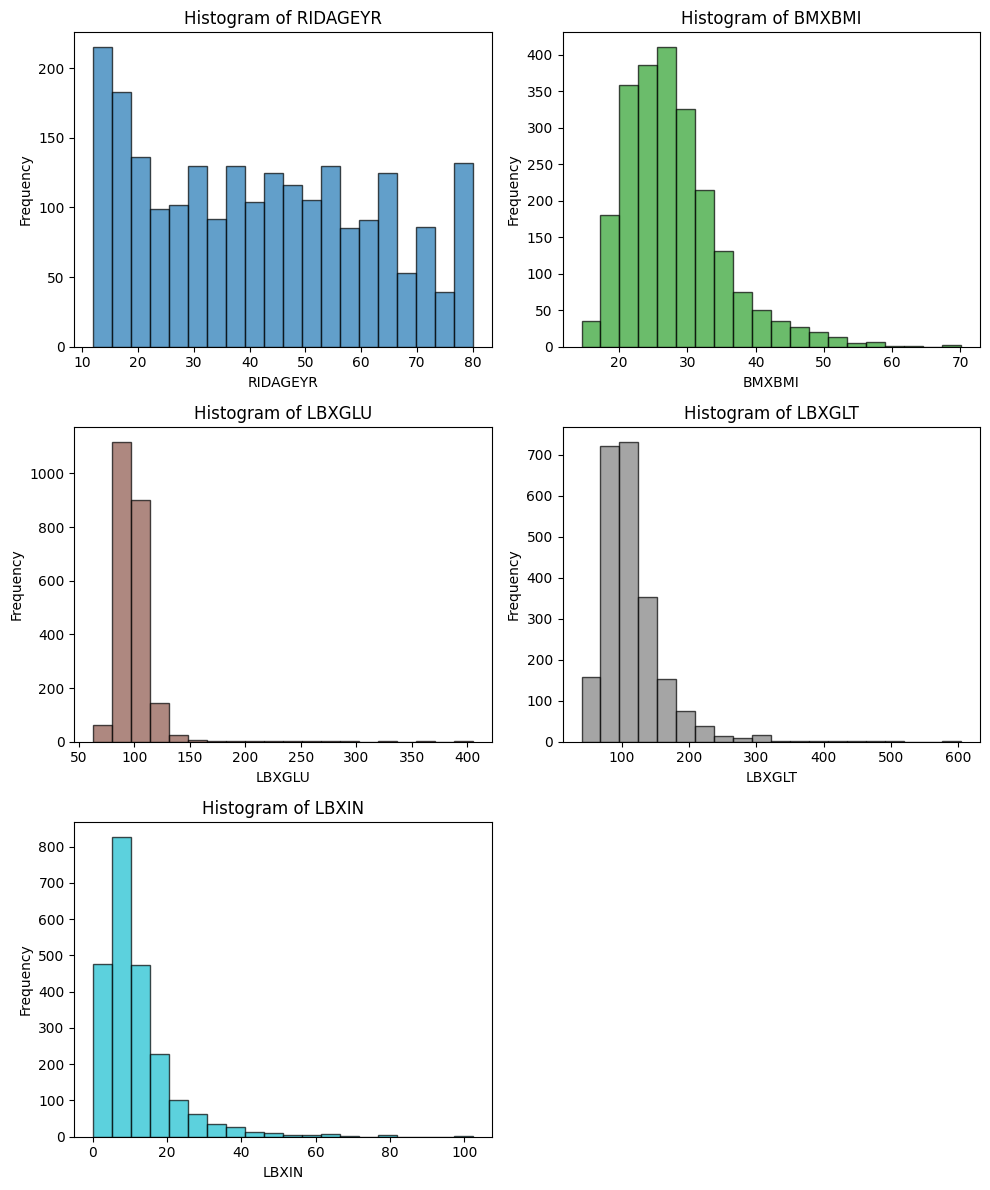

"#plt.figure(figsize=(12, 8))\n\n# Create a boxplot for each variable\nsns.boxplot(data=data[X_columns], orient='h', palette='Set2')\n\n# Customizing the plot\nplt.title('Boxplots for Each Variable', fontsize=14)\nplt.xlabel('Value', fontsize=12)\nplt.ylabel('Variables', fontsize=12)\nplt.grid(axis='x')\n\n# Show the plot\nplt.show()"

In [ ]:
# 1 Create histograms and boxplots for each variable.
colors = plt.cm.get_cmap('tab10', len(X_columns))

plt.figure(figsize=(10, 12))

for i, col in enumerate(X_columns):
    plt.subplot(3, 2, i + 1)
    plt.hist(data[col], bins=20, color=colors(i), alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


'''#plt.figure(figsize=(12, 8))

# Create a boxplot for each variable
sns.boxplot(data=data[X_columns], orient='h', palette='Set2')

# Customizing the plot
plt.title('Boxplots for Each Variable', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x')

# Show the plot
plt.show()'''

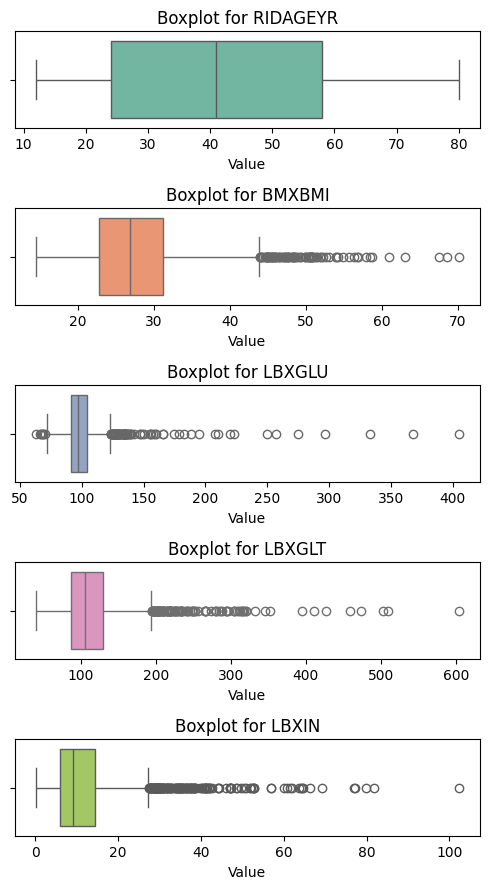

In [ ]:
colors = sns.color_palette("Set2", len(df.columns))
num_vars = len(X_columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(5, 1.8 * num_vars))


for idx, var in enumerate(X_columns):
    sns.boxplot(data=df[var], orient='h', color=colors[idx], ax=axes[idx])


    axes[idx].set_title(f'Boxplot for {var}', fontsize=12)
    axes[idx].set_xlabel('Value', fontsize=10)
    axes[idx].set_ylabel('')
plt.tight_layout()


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

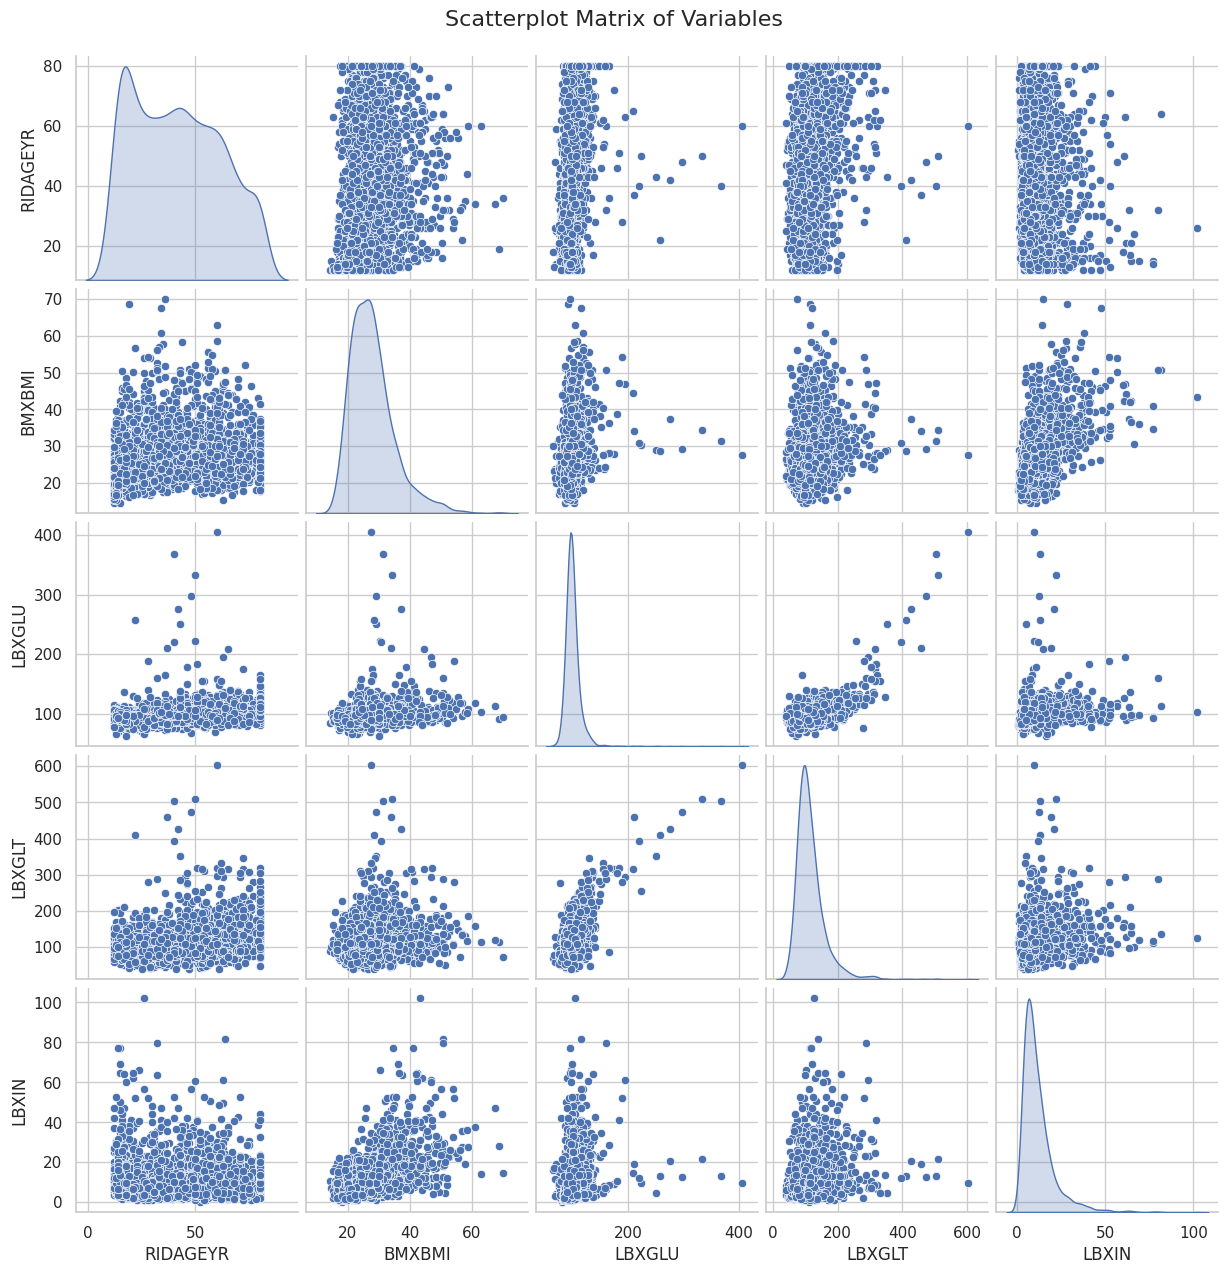

In [ ]:

# 2) Generate scatter plots for all pairs of variables

sns.set(style='whitegrid')

pairplot = sns.pairplot(data[X_columns], diag_kind='kde', palette='Set2', markers='o')
pairplot.fig.suptitle('Scatterplot Matrix of Variables', y=1.02, fontsize=16)

plt.show()

Mean Vector:
 RIDAGEYR     41.795874
BMXBMI       27.955180
LBXGLU       99.553117
LBXGLT      114.978929
LBXIN        11.834794
dtype: float64

Covariance Matrix:
             RIDAGEYR     BMXBMI      LBXGLU       LBXGLT      LBXIN
RIDAGEYR  406.268810  21.502134   82.799824   301.687836 -17.998525
BMXBMI     21.502134  52.547446   27.016809    65.968796  38.939641
LBXGLU     82.799824  27.016809  320.046145   577.201383  36.844567
LBXGLT    301.687836  65.968796  577.201383  2214.760206  99.375529
LBXIN     -17.998525  38.939641   36.844567    99.375529  94.455299

Correlation Matrix:
           RIDAGEYR    BMXBMI    LBXGLU    LBXGLT     LBXIN
RIDAGEYR  1.000000  0.147163  0.229624  0.318044 -0.091879
BMXBMI    0.147163  1.000000  0.208330  0.193375  0.552717
LBXGLU    0.229624  0.208330  1.000000  0.685579  0.211911
LBXGLT    0.318044  0.193375  0.685579  1.000000  0.217272
LBXIN    -0.091879  0.552717  0.211911  0.217272  1.000000


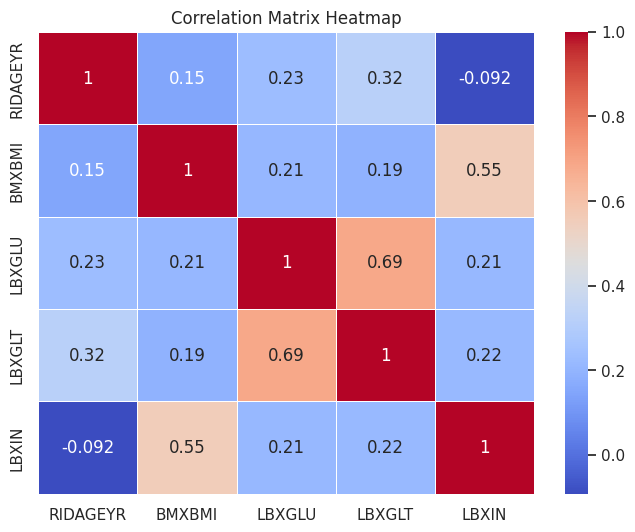

In [ ]:
# 3) Calculate the mean vector, covariance matrix, and correlation matrix
mean_vector = X_data.mean()
cov_matrix = X_data.cov()
corr_matrix = X_data.corr()

print("Mean Vector:\n", mean_vector)
print("\nCovariance Matrix:\n", cov_matrix)
print("\nCorrelation Matrix:\n", corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

In [ ]:

fig = sp.make_subplots(rows=len(X_columns), cols=len(X_columns), shared_xaxes=True, shared_yaxes=True)

for i, var1 in enumerate(X_columns):
    for j, var2 in enumerate(X_columns):
        if i < j:
            contour = go.Histogram2dContour(
                x=df[var2],
                y=df[var1],
                colorscale='Plasma',
                contours=dict(showlabels=True, labelfont=dict(size=10)),
                colorbar=dict(title="Density")
            )
            fig.add_trace(contour, row=i+1, col=j+1)
        else:
            fig.update_xaxes(visible=False, row=i+1, col=j+1)
            fig.update_yaxes(visible=False, row=i+1, col=j+1)

fig.update_layout(
    title="Contour Plots for Each Pair of Variables",
    height=1200,
    width=1200,
    showlegend=False
)

fig.show()

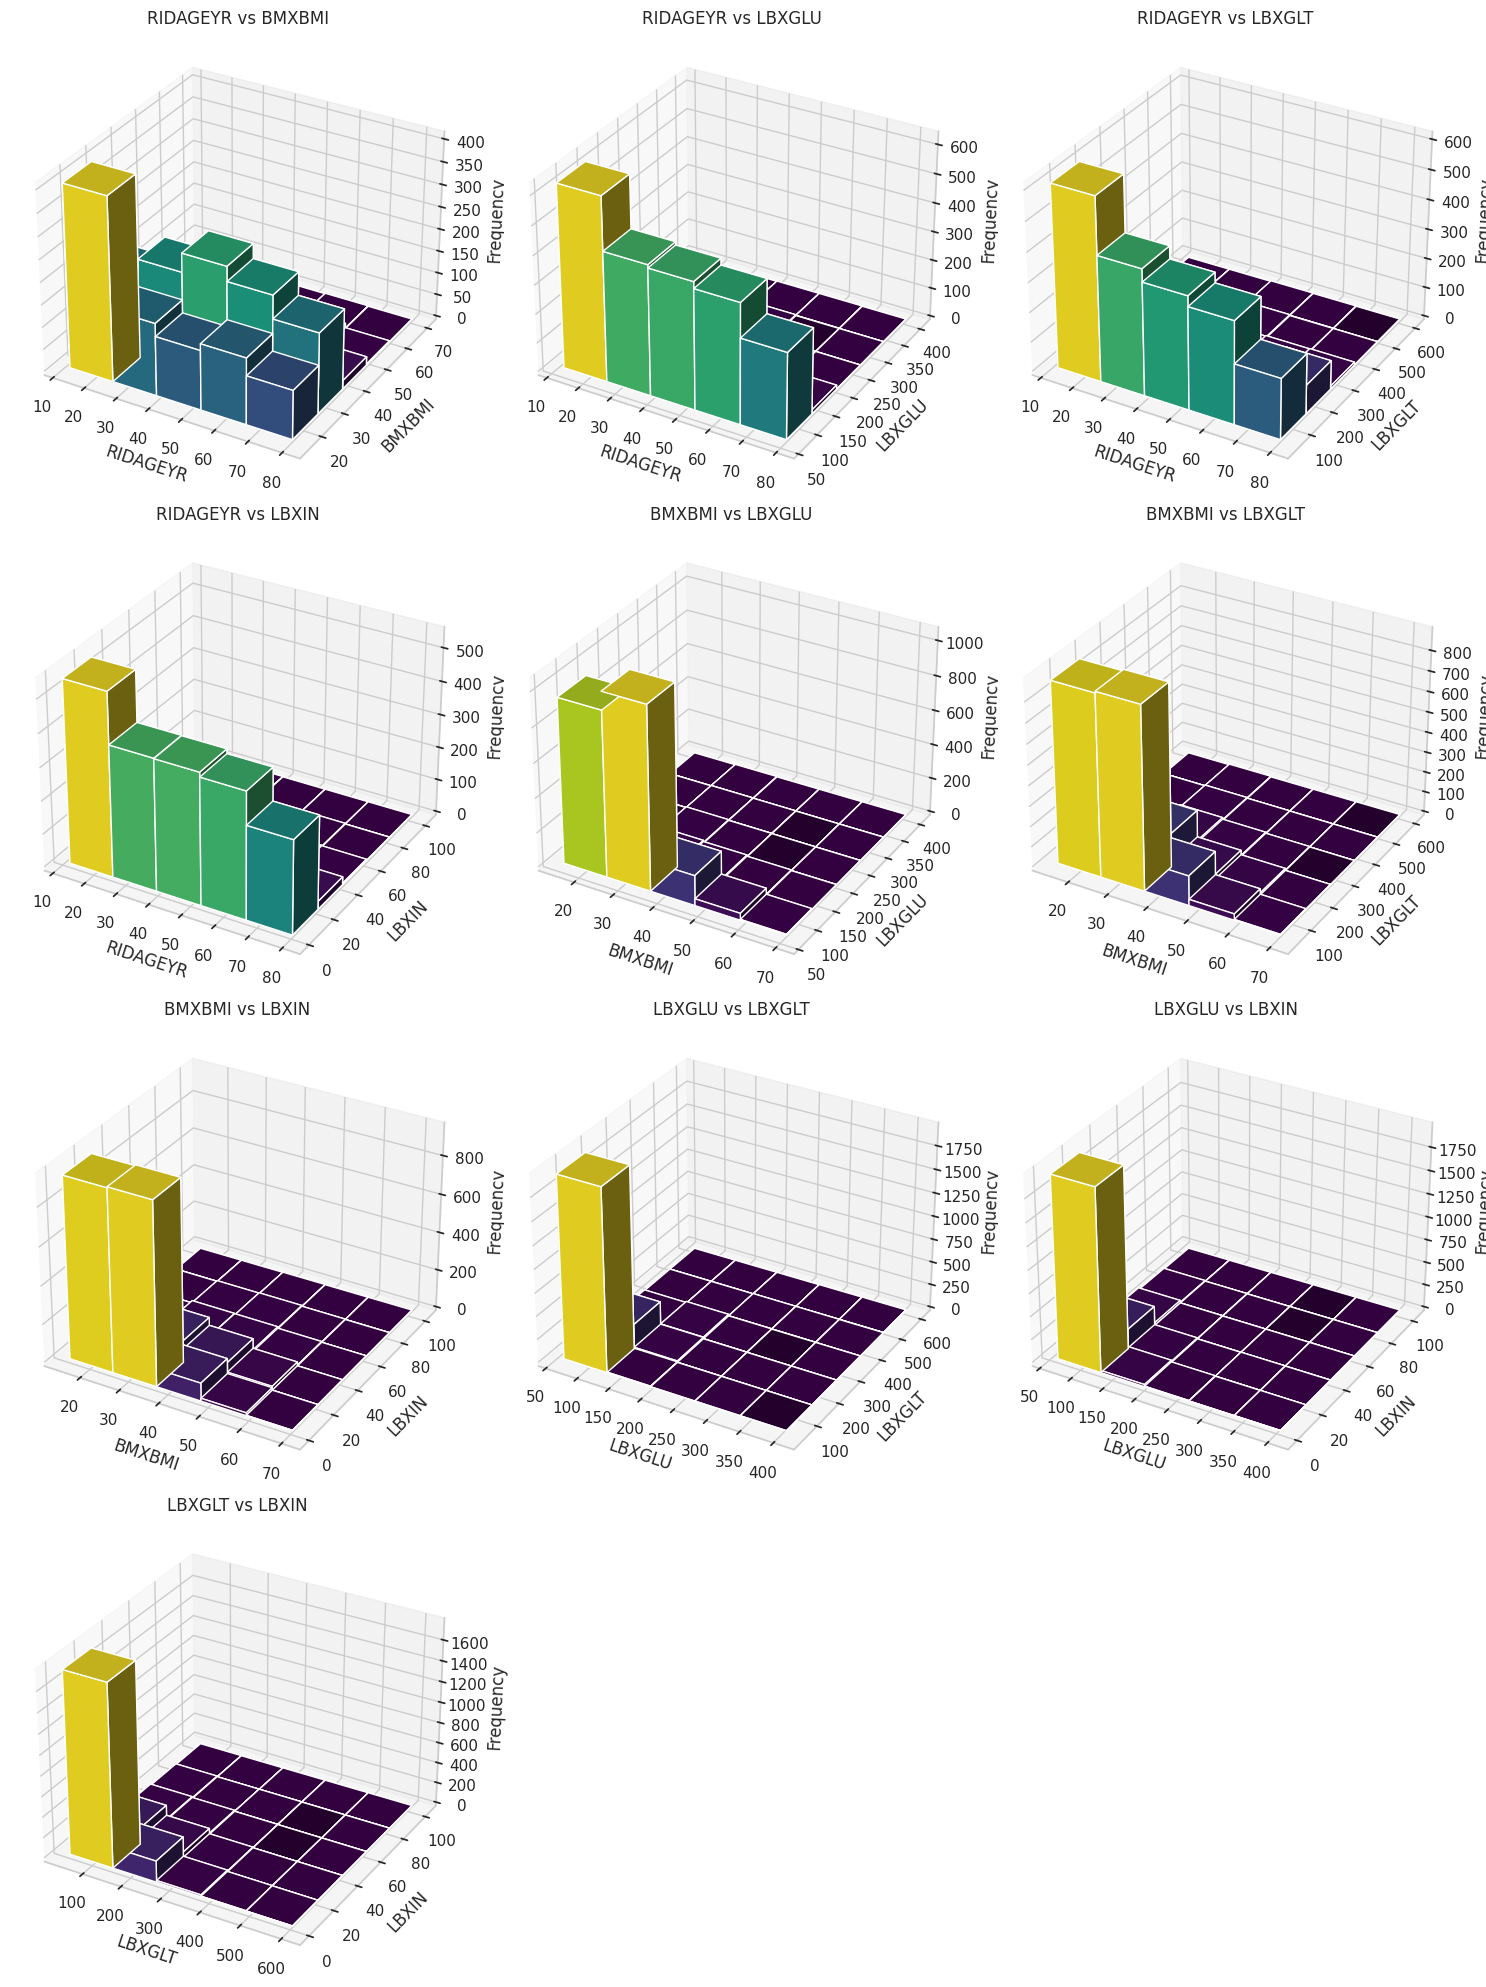

In [ ]:

from matplotlib import cm

df = X_data

columns = df.columns.tolist()
combinations_of_columns = list(combinations(columns, 2))

def create_3d_bar_plot(ax, var1, var2):

    hist, xedges, yedges = np.histogram2d(df[var1], df[var2], bins=5)

    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)

    dz = hist.ravel()

    dx = (xedges[1] - xedges[0]) * np.ones_like(dz)
    dy = (yedges[1] - yedges[0]) * np.ones_like(dz)

    norm = plt.Normalize(vmin=dz.min(), vmax=dz.max())
    colors = cm.viridis(norm(dz))

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel('Frequency')
    ax.set_title(f'{var1} vs {var2}')


n_plots = len(combinations_of_columns)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig = plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for idx, (var1, var2) in enumerate(combinations_of_columns):
    ax = fig.add_subplot(n_rows, n_cols, idx + 1, projection='3d')
    create_3d_bar_plot(ax, var1, var2)

plt.tight_layout()
plt.show()

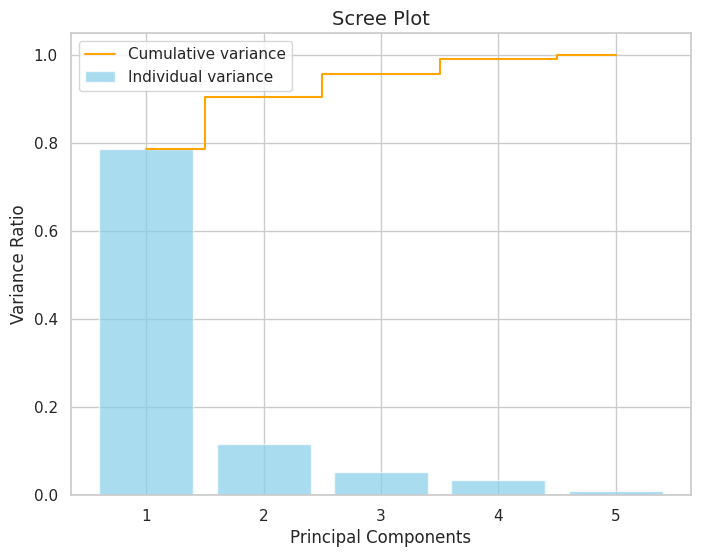

Minimum number of components needed to explain at least 95% of the variance: 3


In [ ]:
# 6) Perform PCA and Scree plot
pca = PCA()
pca.fit(df)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, align='center',
        label='Individual variance', color='skyblue')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative variance', color='orange')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot', fontsize=14)
plt.legend(loc='best')
plt.show()

print(f"Minimum number of components needed to explain at least 95% of the variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

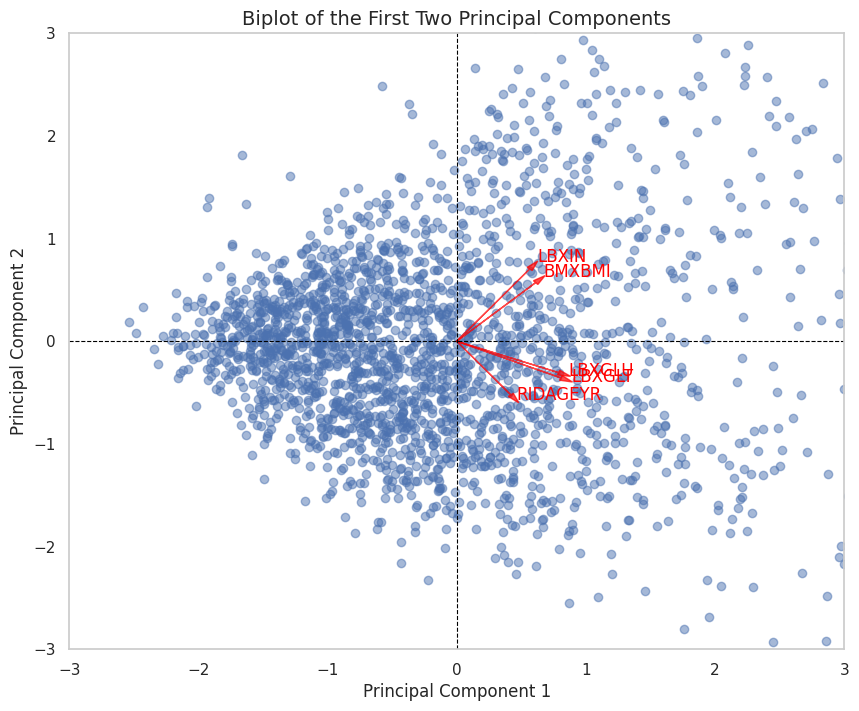

In [ ]:
# 7) Biplot for the first two principal components

features = data[X_columns]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_features)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(10, 8))

plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.5)

for i, var in enumerate(X_columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='red', alpha=0.7,
              head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='red', fontsize=12)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of the First Two Principal Components', fontsize=14)
plt.grid()

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', lw=0.8, ls='--')
plt.axvline(0, color='black', lw=0.8, ls='--')

plt.show()

In [ ]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42568 sha256=5044488e99859b87b6483a80704d4076ed168ad3684467e54dd9a2695904544f
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
# 8) Perform Factor Analysis on the dataset using two factors (). Using the principal component method, estimate the factor loading matrix and specific variance matrix . Interpret the result.

n_factors = 2

fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation=None)
fa.fit(df)

eigenvalues, _ = fa.get_eigenvalues()
print("\nEigenvalues:")
print(eigenvalues)

factor_loadings = fa.loadings_
print("\nFactor Loading Matrix:")
print(pd.DataFrame(factor_loadings, index=df.columns, columns=[f'Factor {i+1}' for i in range(n_factors)]))

specific_variance = fa.get_uniquenesses()
print("\nSpecific Variance Matrix:")
print(pd.DataFrame(specific_variance, index=df.columns, columns=['Specific Variance']))

variance_explained = fa.get_factor_variance()
print("\nVariance Explained by Each Factor:")
print(pd.DataFrame({
    'Factor': [f'Factor {i+1}' for i in range(n_factors)],
    'Variance': variance_explained[0],
    'Proportion': variance_explained[1],
    'Cumulative': variance_explained[2]
}))

# Interpretation of results
print("\nInterpretation:")
for i, col in enumerate(df.columns):
    print(f"\n{col}:")
    for j in range(n_factors):
        print(f"  Loading on Factor {j+1}: {factor_loadings[i, j]:.4f}")
    print(f"  Specific Variance: {specific_variance[i]:.4f}")


Eigenvalues:
[2.13547232 1.3145445  0.85433114 0.39623335 0.29941868]

Factor Loading Matrix:
          Factor 1  Factor 2
RIDAGEYR  0.418294 -0.521957
BMXBMI    0.610665  0.571110
LBXGLU    0.788009 -0.305586
LBXGLT    0.804966 -0.356499
LBXIN     0.564502  0.703892

Specific Variance Matrix:
          Specific Variance
RIDAGEYR           0.552590
BMXBMI             0.300921
LBXGLU             0.285660
LBXGLT             0.224939
LBXIN              0.185874

Variance Explained by Each Factor:
     Factor  Variance  Proportion  Cumulative
0  Factor 1  2.135472    0.427094    0.427094
1  Factor 2  1.314544    0.262909    0.690003

Interpretation:

RIDAGEYR:
  Loading on Factor 1: 0.4183
  Loading on Factor 2: -0.5220
  Specific Variance: 0.5526

BMXBMI:
  Loading on Factor 1: 0.6107
  Loading on Factor 2: 0.5711
  Specific Variance: 0.3009

LBXGLU:
  Loading on Factor 1: 0.7880
  Loading on Factor 2: -0.3056
  Specific Variance: 0.2857

LBXGLT:
  Loading on Factor 1: 0.8050
  Loading o

In [ ]:
df

,RIDAGEYR,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,61.0,35.7,110.0,150.0,14.91
1,26.0,20.3,89.0,80.0,3.85
2,16.0,23.2,89.0,68.0,6.14
3,32.0,28.9,104.0,84.0,16.15
4,38.0,35.9,103.0,81.0,10.92
...,...,...,...,...,...
2273,38.0,33.5,100.0,73.0,6.53
2274,61.0,30.0,93.0,208.0,13.02
2275,34.0,23.7,103.0,124.0,21.41
2276,60.0,27.4,90.0,108.0,4.99


In [ ]:
target_variable = df.columns[-1]
median_value = df[target_variable].median()


df['Y'] = np.where(df[target_variable] < median_value, 0, 1)

df = df.drop(columns=[target_variable])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(columns=['Y'])
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Task 1: Quadratic Discriminant Analysis (Unequal Variances)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_predictions = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
qda_misclassification = 1 - qda_accuracy
print(f"Task 1: QDA Misclassification Proportion: {qda_misclassification:.4f}")

Task 1: QDA Misclassification Proportion: 0.3421


In [ ]:
# Task 2: Linear Discriminant Analysis (Equal Variances)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
lda_misclassification = 1 - lda_accuracy
print(f"Task 2: LDA Misclassification Proportion: {lda_misclassification:.4f}")

Task 2: LDA Misclassification Proportion: 0.2939


In [ ]:
# Task 3: Fisher’s Discriminant Analysis

print(f"Task 3: Fisher's Discriminant Analysis Misclassification Proportion: {lda_misclassification:.4f}")

Task 3: Fisher's Discriminant Analysis Misclassification Proportion: 0.2939


In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
misclassification_tree = 1 - accuracy_score(y_test, y_pred)
print("Decision Tree Misclassification Proportion:", misclassification_tree)

Decision Tree Misclassification Proportion: 0.35526315789473684
